In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv
/kaggle/input/bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv


In [46]:
data = pd.read_csv("/kaggle/input/bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv")
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


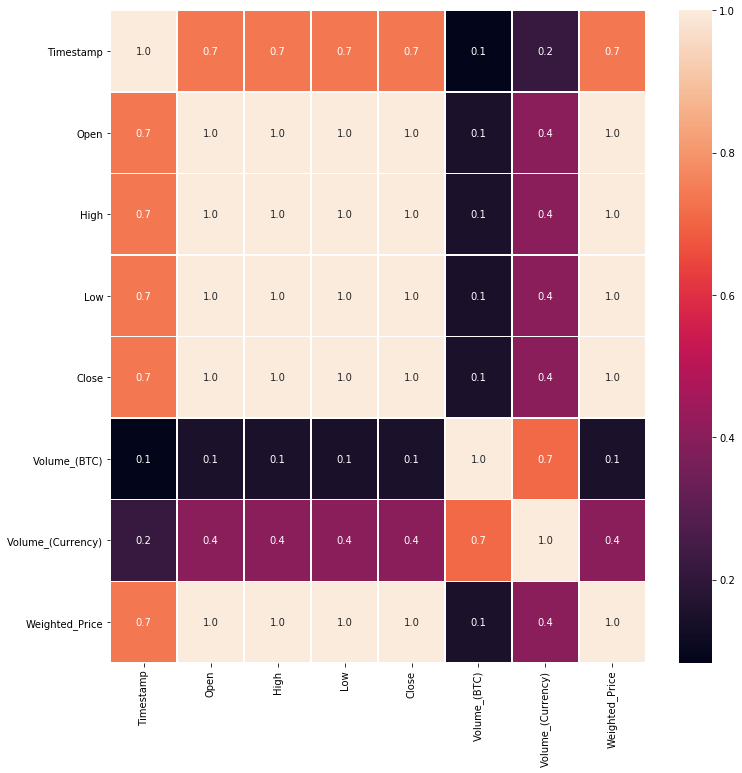

In [48]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt=".1f", ax=ax)
plt.show()

In [49]:
for index,value in data[ ['Weighted_Price']][5:10].iterrows():
    print(index,": ",value)

5 :  Weighted_Price   NaN
Name: 5, dtype: float64
6 :  Weighted_Price   NaN
Name: 6, dtype: float64
7 :  Weighted_Price    300.0
Name: 7, dtype: float64
8 :  Weighted_Price   NaN
Name: 8, dtype: float64
9 :  Weighted_Price   NaN
Name: 9, dtype: float64


In [50]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2099755,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2099756,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2099757,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
2099758,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991
2099759,1546898760,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614


In [51]:
data.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [52]:
data.shape

# row = 2099760, column = 8

(2099760, 8)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 128.2 MB


In [54]:
# value_counts
# dropna=False -> Nan değerleri de say

d = data["Low"].value_counts(dropna=False)
d

NaN         109069
6399.99        446
238.00         373
6400.00        336
237.00         327
             ...  
8040.07          1
14502.75         1
8087.18          1
3838.36          1
6287.66          1
Name: Low, Length: 432870, dtype: int64

### Quantile

5 , 7 , 8 , 3 , 12 , 18 , 17, 19 , 14


* median = 12
* Lower Quartile (Q1) = 8 ==> 5 , 7 , **8** , 3 , 12
* Upper Quartile (Q3) = 17 ==> 12 , 18 , **17**, 19 , 14
* Outliers 


In [67]:
data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.099760e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06,1.990691e+06
mean,1.483899e+09,3.246403e+03,3.247829e+03,3.244856e+03,3.246403e+03,7.849139e+00,3.600157e+04,3.246341e+03
std,3.638214e+07,3.799154e+03,3.801394e+03,3.796761e+03,3.799150e+03,1.873222e+01,1.401879e+05,3.799078e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.452410e+09,4.195800e+02,4.196400e+02,4.195000e+02,4.195700e+02,9.024000e-01,6.440031e+02,4.195645e+02
50%,1.483906e+09,1.014580e+03,1.014890e+03,1.014150e+03,1.014530e+03,2.692900e+00,3.695642e+03,1.014512e+03
75%,1.515402e+09,6.322630e+03,6.324010e+03,6.321090e+03,6.322670e+03,7.600965e+00,1.972392e+04,6.322550e+03
max,1.546899e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


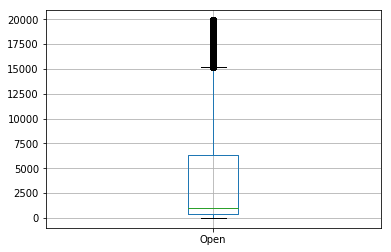

In [56]:
# Visual Exploratory Data Analysis

data.boxplot(column="Open")
plt.show()

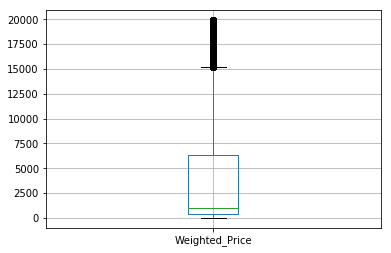

In [57]:
data.boxplot(column="Weighted_Price")

In [68]:
# Tidy 
# Melt

data_new = data.head()
data_new

melted = pd.melt(frame=data_new, id_vars="Timestamp", value_vars=["High","Low"])
melted

,Timestamp,variable,value
0,1.417412e+09,High,300.0
1,1.417412e+09,High,NaN
2,1.417412e+09,High,NaN
3,1.417412e+09,High,NaN
4,1.417412e+09,High,NaN
5,1.417412e+09,Low,300.0
6,1.417412e+09,Low,NaN
7,1.417412e+09,Low,NaN
8,1.417412e+09,Low,NaN
9,1.417412e+09,Low,NaN


In [59]:
# pivoting data
melted.pivot(index="Timestamp", columns="variable", values="value")

variable,High,Low
Timestamp,,
1417411980,300.0,300.0
1417412040,NaN,NaN
1417412100,NaN,NaN
1417412160,NaN,NaN
1417412220,NaN,NaN


In [60]:
# Concatenating Data
# 1 . Dikey birleştirme : axis=0

data1 = data.head()
data2 = data.tail()

concat = pd.concat([data1,data2], axis=0, ignore_index=True)
concat

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1546898520,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
6,1546898580,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
7,1546898640,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635
8,1546898700,4006.01,4006.01,4005.50,4005.50,2.699700,10814.241898,4005.719991
9,1546898760,4005.51,4006.01,4005.51,4005.99,1.752778,7021.183546,4005.745614


In [61]:
# 2. Yatay birleştirme

data1 = data["Timestamp"][10:15]
data2 = data["High"][1200:1205]

concat2 = pd.concat([data1,data2], axis=1)
concat2

,Timestamp,High
10,1.417413e+09,NaN
11,1.417413e+09,NaN
12,1.417413e+09,NaN
13,1.417413e+09,NaN
14,1.417413e+09,NaN
1200,NaN,NaN
1201,NaN,NaN
1202,NaN,NaN
1203,NaN,NaN
1204,NaN,NaN


In [62]:
# Data types
data.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [63]:
#data convert
int(1.2)

1

In [70]:
data["Timestamp"] = data["Timestamp"].astype('float')

In [69]:
data.dtypes

Timestamp            float64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [71]:
data["Low"].value_counts(dropna=False)

NaN         109069
6399.99        446
238.00         373
6400.00        336
237.00         327
             ...  
8040.07          1
14502.75         1
8087.18          1
3838.36          1
6287.66          1
Name: Low, Length: 432870, dtype: int64

In [73]:
# 109069 Nan data var
# bu değerleri listeden atma

data["Low"].dropna(inplace=True)

In [74]:
data["Low"].value_counts(dropna=False)

6399.99     446
238.00      373
6400.00     336
237.00      327
237.50      301
           ... 
13496.58      1
7020.64       1
5929.18       1
2221.13       1
17390.20      1
Name: Low, Length: 432869, dtype: int64

In [77]:
# Nan değerler gitti
#yukarıda yapılan işlemin işe yarayıp yaramadığını anlamak için;

assert data["Low"].notnull().all()

#birşey döndürmüyorsa doğru demektir

In [79]:
# Nan value'lara empty yaz

data["Low"].fillna("empty",inplace=True)

In [80]:
data.head(1)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1.417412e+09,300.0,300.0,300.0,300.0,0.01,3.0,300.0


In [83]:
# 1. column adı Open old ıcın bişi döndürmez
assert data.columns[1]=="Open"